<a href="https://colab.research.google.com/github/mitchelljojo/Portofolio/blob/main/Investment%20Clusterin%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Question : 
- What kind thematic campaigns that we can recommend ?
- Marketing team want to crete thematic campaign based on user preference -> Using Segmentation to see our user preference

# Uploading Library and Dataset

In [ ]:
#Importing Basic Necessery Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()

## Importing Dataset and Understanding dataset

For Intermediate assignment we have 2 dataset which is users (Registered user in our platform) and daily_user_transaction (User-level mutual fund balance available daily)

In [ ]:
#Importing our user dataset from Google Sheet
url_sheet = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
transfer = url_sheet.replace('/edit#gid=', '/export?format=csv&gid=')
raw_user = pd.read_csv(transfer)
#Checking our dataset looks
raw_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


In [ ]:
#Importing our daily_user_Transaction dataset from Google Sheet
url_sheet = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
transfer = url_sheet.replace('/edit#gid=', '/export?format=csv&gid=')
raw_transaction = pd.read_csv(transfer)
#Checking our dataset looks
raw_transaction.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


As we see we know that in our user dataset we have information about : 
- User time registration, gender, age, occupation, income, and their total investment at our platform

In our transaction we could see :
- How the transaction for each user in specific date and what kind of product that our user bought

# Feature Engineering

Lets start with our user data set 
We will adding 2 which is : 
- Age group generation ( Boomer, Gen X, Gen Z, Millenial)
- User Income Group (Crazy Rich, Upper level Citizen, Middle Level Citizen, Low Level Citizen)
- User Birth Year
- Account Duration

In [ ]:
#Checking data info
raw_user.info()
#We need to change our user ID to string and registration to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
#Changing our user id to string and our registration to date time
raw_user['registration_import_datetime'] = pd.to_datetime(raw_user['registration_import_datetime'])
raw_user['user_id'] = raw_user['user_id'].astype(str)
#Checking our data type
raw_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

In [ ]:
#Creating birth year with assuming current year
raw_user['Birth_Year'] = abs(raw_user['user_age'] - 2023)
raw_user.describe(include='all')

<ipython-input-6-e1fcddf16565>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_user.describe(include='all')


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year
count,14712,14712,14712,14712.000000,14712,14712,5604,14712,1.471200e+04,1.471200e+04,1.471200e+04,14712.000000
unique,14712,11536,2,NaN,9,6,1,10,NaN,NaN,NaN,NaN
top,162882,2021-09-01 19:28:19,Male,NaN,Pelajar,< 10 Juta,used referral,Gaji,NaN,NaN,NaN,NaN
freq,1,5,8977,NaN,7887,6275,5604,9131,NaN,NaN,NaN,NaN
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-10-27 12:35:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,27.176591,NaN,NaN,NaN,NaN,1.445996e+06,8.427521e+05,-1.648629e+05,1995.823409
std,NaN,NaN,NaN,8.552585,NaN,NaN,NaN,NaN,1.907388e+07,1.289743e+07,2.716129e+06,8.552585
min,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-1.850000e+08,1940.000000
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1992.000000


In [ ]:
#From the data set we have age group from 1940 - 2006 hence 
#Boomers = 1940 - 1964
#GenX = 1965-1980
#Millenial = 1981-1996
#GenZ = 1997-2006
filter = [
    (raw_user.Birth_Year >=1940) & (raw_user.Birth_Year <=1964),
    (raw_user.Birth_Year >=1965) & (raw_user.Birth_Year <=1980),
    (raw_user.Birth_Year >=1981) & (raw_user.Birth_Year <=1996),
    (raw_user.Birth_Year >=1997) & (raw_user.Birth_Year <=2006)
]
values =['Boomers','GenX','Millenial','GenZ']

In [ ]:
#Adding the filter to create age group
raw_user['Age_Group'] = np.select(filter, values)
raw_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,Age_Group
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0,1972,GenX
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0,1968,GenX
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0,1973,GenX
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0,1970,GenX
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0,1976,GenX


In [ ]:
#First we check what is the value in income_range before we making the new categorical value
cat_col = ['user_occupation','user_income_range','user_income_source']

for i in cat_col:
  print(raw_user[i].value_counts())
#We will change this later on in data cleaning progress
#Low Class = Under 10 Million
#Middle Class =10 - 100 Million
#Upper Clas = 100 Million - 1 Billion
#Crazy Rich = >1Billion

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64
Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64


Next we will go to our transaction dataset

In [ ]:
#Filterin our transaction to only end of month transaction
raw_monthly = raw_transaction[(raw_transaction['date']=='2021-08-31') | (raw_transaction['date']=='2021-09-30') ]
raw_monthly

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
23,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
24,50961,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,700000.0,100000.0,200000.0,NaN,1000000
46,50961,2021-09-30,300000.0,NaN,600000.0,NaN,1200000.0,NaN,NaN,NaN,2100000,0,2000000.0,700000.0,1400000.0,NaN,4100000
52,53759,2021-08-31,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,70000.0,10000.0,20000.0,NaN,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0
158807,4165132,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,10000.0,NaN,NaN,10000
158808,4165630,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,40000.0,10000.0,50000.0,NaN,100000
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,10000.0,NaN,10000


In [ ]:
#For now we will remove because there is something wrong with the data column and will investigate later, 
#in here we will check user transaction on saham,pasaruang,pdpt tetap, and campuran including the total investment
raw_monthly.drop(['buy_saham_transaction_amount','sell_saham_transaction_amount',
                    'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
                    'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount',
                    'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
                    'total_buy_transaction_amount','total_sell_transaction_amount'],axis=1,inplace=True)
raw_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 1 to 158810
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           11352 non-null  int64  
 1   date                              11352 non-null  object 
 2   saham_invested_amount             7544 non-null   float64
 3   pasar_uang_invested_amount        9367 non-null   float64
 4   pendapatan_tetap_invested_amount  7508 non-null   float64
 5   campuran_invested_amount          348 non-null    float64
 6   total_invested_amount             11352 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 709.5+ KB


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
raw_transaction.drop(['buy_saham_transaction_amount','sell_saham_transaction_amount',
                    'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount',
                    'buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount',
                    'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
                    'total_buy_transaction_amount','total_sell_transaction_amount'],axis=1,inplace=True)
raw_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_id                           158811 non-null  int64  
 1   date                              158811 non-null  object 
 2   saham_invested_amount             106292 non-null  float64
 3   pasar_uang_invested_amount        131081 non-null  float64
 4   pendapatan_tetap_invested_amount  105946 non-null  float64
 5   campuran_invested_amount          5352 non-null    float64
 6   total_invested_amount             158811 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.5+ MB


# Data Cleaning

## Removing Irrelevent Value


As we know our business objective are marketing campaign for our user and we need to create segmentation for our user not focusing on user acquisition hence we will focus on see characteristic of our user

In [ ]:
cat_col = ['user_gender','referral_code_used','Age_Group','user_occupation','user_income_range']

for i in cat_col:
  print(raw_user[i].value_counts())
  print('\n')

Male      8977
Female    5735
Name: user_gender, dtype: int64


used referral    5604
Name: referral_code_used, dtype: int64


GenZ         8692
Millenial    5010
GenX          936
Boomers        74
Name: Age_Group, dtype: int64


Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64


< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64




Changing the value to others for PNS,Guru,TNI, dan Pensiunan

In [ ]:
raw_user.loc[raw_user['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
raw_user.loc[raw_user['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
raw_user.loc[raw_user['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
raw_user.loc[raw_user['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'

raw_user['user_occupation'].value_counts()


Pelajar      7887
Swasta       3263
Others       2030
IRT           934
Pengusaha     598
Name: user_occupation, dtype: int64

## Handling Missing Data

In [ ]:
#Checking the missing data
raw_user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
Birth_Year                         0
Age_Group                          0
dtype: int64

In [ ]:
#Filling the missing value in referral as "Not using Referral"
raw_user['referral_code_used'] = raw_user['referral_code_used'].fillna('Not using Referral')
raw_user.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
Birth_Year                      0
Age_Group                       0
dtype: int64

End Trans = Monthly Transaction , raw_trans = Daily Transaction

In [ ]:
raw_transaction.isna().sum()

user_id                                  0
date                                     0
saham_invested_amount                52519
pasar_uang_invested_amount           27730
pendapatan_tetap_invested_amount     52865
campuran_invested_amount            153459
total_invested_amount                    0
dtype: int64

In [ ]:
raw_transaction = raw_transaction.fillna(0)
raw_transaction.isna().sum()

user_id                             0
date                                0
saham_invested_amount               0
pasar_uang_invested_amount          0
pendapatan_tetap_invested_amount    0
campuran_invested_amount            0
total_invested_amount               0
dtype: int64

In [ ]:
raw_monthly = raw_monthly.fillna(0)
raw_monthly.isna().sum()

user_id                             0
date                                0
saham_invested_amount               0
pasar_uang_invested_amount          0
pendapatan_tetap_invested_amount    0
campuran_invested_amount            0
total_invested_amount               0
dtype: int64

## Removing Duplicate Data

In [ ]:
#Checking the duplicated value on Foreign Key of user data
raw_user.duplicated('user_id').sum()

0

In [ ]:
#Checking duplicated value on the row of dataset 
raw_monthly.duplicated().sum()

0

In [ ]:
#Checking duplicated value on the row of dataset
raw_transaction.duplicated().sum()

0

## Handling Outlier Data

<AxesSubplot:>

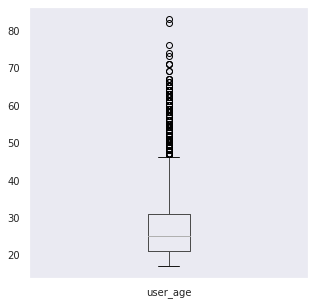

In [ ]:
#Checking user age of our user
raw_user.boxplot(column= ['user_age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

We will not remove the user age because purpose of the analysis are to create thematic marketing of user preference in our platform

In [ ]:
#Checking outlier in saham
daily_trans_saham = raw_transaction[raw_transaction['saham_invested_amount'] !=0]
Q1 = daily_trans_saham['saham_invested_amount'].quantile(0.25)
Q3 = daily_trans_saham['saham_invested_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_saham = Q1 - 1.5 * IQR
upper_saham = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower :',lower_saham)
print('Upper :',upper_saham)

Q1: 50000.0
Q3: 280000.0
IQR: 230000.0
Lower : -295000.0
Upper : 625000.0


In [ ]:
#Checking outlier in pasar uang
daily_trans_pasar_uang = raw_transaction[raw_transaction['pasar_uang_invested_amount'] !=0]
Q1 = daily_trans_pasar_uang['pasar_uang_invested_amount'].quantile(0.25)
Q3 = daily_trans_pasar_uang['pasar_uang_invested_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_pasar_uang = Q1 - 1.5 * IQR
upper_pasar_uang = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower :',lower_pasar_uang)
print('Upper :',upper_pasar_uang)

Q1: 10000.0
Q3: 200000.0
IQR: 190000.0
Lower : -275000.0
Upper : 485000.0


In [ ]:
#Checking outlier in pendapatan tetap
daily_trans_pendapatan_tetap = raw_transaction[raw_transaction['pendapatan_tetap_invested_amount'] !=0]
Q1 = daily_trans_pendapatan_tetap['pendapatan_tetap_invested_amount'].quantile(0.25)
Q3 = daily_trans_pendapatan_tetap['pendapatan_tetap_invested_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_pendapatan_tetap = Q1 - 1.5 * IQR
upper_pendapatan_tetap = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower :',lower_pendapatan_tetap)
print('Upper :',upper_pendapatan_tetap)

Q1: 40000.0
Q3: 345000.0
IQR: 305000.0
Lower : -417500.0
Upper : 802500.0


In [ ]:
#Checking outlier in campuran
daily_trans_campuran = raw_transaction[raw_transaction['campuran_invested_amount'] !=0]
Q1 = daily_trans_campuran['campuran_invested_amount'].quantile(0.25)
Q3 = daily_trans_campuran['campuran_invested_amount'].quantile(0.75)

IQR = Q3 - Q1
lower_campuran = Q1 - 1.5 * IQR
upper_campuran = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower :',lower_campuran)
print('Upper :',upper_campuran)

Q1: 1000000.0
Q3: 5000000.0
IQR: 4000000.0
Lower : -5000000.0
Upper : 11000000.0


In [ ]:
outliers = raw_transaction[
    ~raw_transaction['saham_invested_amount'].between(lower_saham, upper_saham) |
    ~raw_transaction['pasar_uang_invested_amount'].between(lower_pasar_uang, upper_pasar_uang) |
    ~raw_transaction['pendapatan_tetap_invested_amount'].between(lower_pendapatan_tetap, upper_pendapatan_tetap) |
    ~raw_transaction['campuran_invested_amount'].between(lower_campuran, upper_campuran)]
outliers

,user_id,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
24,50961,2021-08-31,700000.0,100000.0,200000.0,0.0,1000000
25,50961,2021-09-01,1700000.0,100000.0,200000.0,0.0,2000000
26,50961,2021-09-02,1700000.0,100000.0,200000.0,0.0,2000000
27,50961,2021-09-03,1700000.0,100000.0,200000.0,0.0,2000000
28,50961,2021-09-06,1700000.0,100000.0,200000.0,0.0,2000000
...,...,...,...,...,...,...,...
158735,4157097,2021-09-30,0.0,0.0,1000000.0,0.0,1000000
158744,4157513,2021-09-30,0.0,0.0,5000000.0,0.0,5000000
158766,4159667,2021-09-30,60000.0,4178672.0,30000.0,0.0,4268672
158779,4160917,2021-09-30,0.0,0.0,2000000.0,0.0,2000000


In [ ]:
#Checking total outlier from the filter that we use above for each of investment instrument
Total_Outlier_User = outliers['user_id'].drop_duplicates().values.tolist()
len(Total_Outlier_User)

1611

In [ ]:
#We will remove the daily transaction outlier data 
daily_user_clean= raw_transaction[~raw_transaction['user_id'].isin(Total_Outlier_User)]
daily_user_clean

,user_id,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.0,0.0,0.0,10000000.0,10000000
1,50701,2021-08-31,0.0,0.0,0.0,10000000.0,10000000
2,50701,2021-09-01,0.0,0.0,0.0,10000000.0,10000000
3,50701,2021-09-02,0.0,0.0,0.0,10000000.0,10000000
4,50701,2021-09-03,0.0,0.0,0.0,10000000.0,10000000
...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0
158807,4165132,2021-09-30,0.0,10000.0,0.0,0.0,10000
158808,4165630,2021-09-30,40000.0,10000.0,50000.0,0.0,100000
158809,4165704,2021-09-30,0.0,0.0,10000.0,0.0,10000


In [ ]:
#we will do the same for the monthly transaction 

monthly_trans_clean= raw_monthly[~raw_monthly['user_id'].isin(Total_Outlier_User)]
monthly_trans_clean

,user_id,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,0.0,0.0,0.0,10000000.0,10000000
23,50701,2021-09-30,0.0,0.0,0.0,10000000.0,10000000
52,53759,2021-08-31,70000.0,10000.0,20000.0,0.0,100000
74,53759,2021-09-30,70000.0,10000.0,20000.0,0.0,100000
114,61414,2021-08-31,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0
158807,4165132,2021-09-30,0.0,10000.0,0.0,0.0,10000
158808,4165630,2021-09-30,40000.0,10000.0,50000.0,0.0,100000
158809,4165704,2021-09-30,0.0,0.0,10000.0,0.0,10000


## Converting data type


In [ ]:
#Change date to datetime and user_id to string

daily_user_clean['date'] = pd.to_datetime(daily_user_clean['date'])
daily_user_clean['user_id'] = daily_user_clean['user_id'].astype(str)
daily_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123324 entries, 0 to 158810
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           123324 non-null  object        
 1   date                              123324 non-null  datetime64[ns]
 2   saham_invested_amount             123324 non-null  float64       
 3   pasar_uang_invested_amount        123324 non-null  float64       
 4   pendapatan_tetap_invested_amount  123324 non-null  float64       
 5   campuran_invested_amount          123324 non-null  float64       
 6   total_invested_amount             123324 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 7.5+ MB


<ipython-input-32-90eea75009c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_user_clean['date'] = pd.to_datetime(daily_user_clean['date'])
<ipython-input-32-90eea75009c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_user_clean['user_id'] = daily_user_clean['user_id'].astype(str)


In [ ]:
#Converting data type of monthly_trans
monthly_trans_clean['date'] = pd.to_datetime(monthly_trans_clean['date'])
monthly_trans_clean['user_id'] = monthly_trans_clean['user_id'].astype(str)
monthly_trans_clean.info()

<ipython-input-33-b0d1fc00d501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trans_clean['date'] = pd.to_datetime(monthly_trans_clean['date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8978 entries, 1 to 158810
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8978 non-null   object        
 1   date                              8978 non-null   datetime64[ns]
 2   saham_invested_amount             8978 non-null   float64       
 3   pasar_uang_invested_amount        8978 non-null   float64       
 4   pendapatan_tetap_invested_amount  8978 non-null   float64       
 5   campuran_invested_amount          8978 non-null   float64       
 6   total_invested_amount             8978 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 561.1+ KB


<ipython-input-33-b0d1fc00d501>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trans_clean['user_id'] = monthly_trans_clean['user_id'].astype(str)


## Merge Dataset

In [ ]:
#Merging thedaily transaction
df_daily = pd.merge(raw_user,daily_user_clean, on=['user_id'])
df_daily

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,Age_Group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-08-17,190000.0,40000.0,270000.0,0.0,500000
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-08-18,190000.0,40000.0,270000.0,0.0,500000
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-08-19,190000.0,40000.0,270000.0,0.0,500000
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-08-20,190000.0,40000.0,270000.0,0.0,500000
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-08-23,190000.0,40000.0,270000.0,0.0,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123319,3812221,2021-08-11 17:33:05,Male,49,Others,> Rp 100 Juta - 500 Juta,Not using Referral,Gaji,0,150000,-250000,1974,GenX,2021-09-24,0.0,0.0,0.0,0.0,0
123320,3812221,2021-08-11 17:33:05,Male,49,Others,> Rp 100 Juta - 500 Juta,Not using Referral,Gaji,0,150000,-250000,1974,GenX,2021-09-27,0.0,0.0,0.0,0.0,0
123321,3812221,2021-08-11 17:33:05,Male,49,Others,> Rp 100 Juta - 500 Juta,Not using Referral,Gaji,0,150000,-250000,1974,GenX,2021-09-28,0.0,0.0,0.0,0.0,0
123322,3812221,2021-08-11 17:33:05,Male,49,Others,> Rp 100 Juta - 500 Juta,Not using Referral,Gaji,0,150000,-250000,1974,GenX,2021-09-29,0.0,0.0,0.0,0.0,0


In [ ]:
#Merging the monthly transaction
df_monthly = pd.merge(raw_user,monthly_trans_clean, on=['user_id'])
df_monthly

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,Age_Group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-08-31,190000.0,40000.0,270000.0,0.0,500000
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,600000,100000,0,1970,GenX,2021-09-30,290000.0,40000.0,270000.0,0.0,600000
2,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,Not using Referral,Gaji,999000,149000,0,1970,GenX,2021-09-30,40000.0,10000.0,50000.0,899000.0,999000
3,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,10000,0,0,1964,Boomers,2021-09-30,0.0,10000.0,0.0,0.0,10000
4,3718933,2021-08-09 18:59:44,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,Not using Referral,Keuntungan Bisnis,500000,0,0,1973,GenX,2021-08-31,240000.0,40000.0,220000.0,0.0,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,3798265,2021-08-09 10:42:53,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,0,25000,-125000,1974,GenX,2021-09-30,0.0,0.0,0.0,0.0,0
8974,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,435000,240000,0,1974,GenX,2021-08-31,110000.0,130000.0,95000.0,0.0,335000
8975,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,Not using Referral,Gaji,435000,240000,0,1974,GenX,2021-09-30,210000.0,130000.0,95000.0,0.0,435000
8976,3812221,2021-08-11 17:33:05,Male,49,Others,> Rp 100 Juta - 500 Juta,Not using Referral,Gaji,0,150000,-250000,1974,GenX,2021-08-31,0.0,0.0,0.0,0.0,0


# Descriptive Statistic

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123324 entries, 0 to 123323
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   user_id                           123324 non-null  object        
 1   registration_import_datetime      123324 non-null  datetime64[ns]
 2   user_gender                       123324 non-null  object        
 3   user_age                          123324 non-null  int64         
 4   user_occupation                   123324 non-null  object        
 5   user_income_range                 123324 non-null  object        
 6   referral_code_used                123324 non-null  object        
 7   user_income_source                123324 non-null  object        
 8   end_of_month_invested_amount      123324 non-null  int64         
 9   total_buy_amount                  123324 non-null  int64         
 10  total_sell_amount               

In [ ]:
df_daily.describe(include='all')

<ipython-input-37-02a3413e8047>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_daily.describe(include='all')


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,Age_Group,date,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,123324,123324,123324,123324.000000,123324,123324,123324,123324,1.233240e+05,1.233240e+05,1.233240e+05,123324.000000,123324,123324,123324.000000,123324.000000,123324.000000,1.233240e+05,1.233240e+05
unique,6666,5527,2,NaN,5,6,2,10,NaN,NaN,NaN,NaN,4,42,NaN,NaN,NaN,NaN,NaN
top,3734351,2021-08-01 11:28:14,Male,NaN,Pelajar,< 10 Juta,Not using Referral,Gaji,NaN,NaN,NaN,NaN,GenZ,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,42,162,77995,NaN,71133,60194,83192,73825,NaN,NaN,NaN,NaN,77373,6666,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-09-28 13:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,26.477620,NaN,NaN,NaN,NaN,2.083372e+05,9.437027e+04,-7.788516e+04,1996.522380,NaN,NaN,55096.000827,34610.805074,57153.865687,4.881852e+04,1.956792e+05
std,NaN,NaN,NaN,8.221715,NaN,NaN,NaN,NaN,5.960857e+05,4.041185e+05,4.195202e+05,8.221715,NaN,NaN,97868.075351,62969.099938,107070.134724,5.435023e+05,5.766717e+05
min,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-2.000000e+07,1949.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-9.000000e+04,1993.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+04


From here we can see that :
1. There is 6666 user in our platform
2. Our user dominated by male 
3. Our user age in average at 26 with the youngest is 17 and the oldest is 74 and from GenZ
4. Most of our user have income under 10 million and not using referral which the main source are from salary
5. The highest invested ammount is at 11.000.000 which is from campuran investment 

Lets have more detailed in chart below

In [ ]:
df_daily.describe()

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,123324.000000,1.233240e+05,1.233240e+05,1.233240e+05,123324.000000,123324.000000,123324.000000,123324.000000,1.233240e+05,1.233240e+05
mean,26.477620,2.083372e+05,9.437027e+04,-7.788516e+04,1996.522380,55096.000827,34610.805074,57153.865687,4.881852e+04,1.956792e+05
std,8.221715,5.960857e+05,4.041185e+05,4.195202e+05,8.221715,97868.075351,62969.099938,107070.134724,5.435023e+05,5.766717e+05
min,17.000000,0.000000e+00,0.000000e+00,-2.000000e+07,1949.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,21.000000,0.000000e+00,0.000000e+00,-9.000000e+04,1993.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+04
50%,24.000000,1.000000e+05,0.000000e+00,0.000000e+00,1999.000000,0.000000,10000.000000,0.000000,0.000000e+00,1.000000e+05
75%,30.000000,2.000000e+05,1.000000e+05,0.000000e+00,2002.000000,60000.000000,40000.000000,65000.000000,0.000000e+00,2.000000e+05
max,74.000000,1.100000e+07,1.900000e+07,0.000000e+00,2006.000000,620000.000000,482225.000000,800000.000000,1.100000e+07,1.100000e+07


Insight :
1. In average our user are 26 years old with minimum 17 years old and maximum 74 years old
2. In average our user buy 94370 to our investment product with maximum are 19.000.000
3. For sell amount in average they sold  77.885 and maximum are 90000
4. Between 4 investment product the top investment are from campuran with maximum are 11.000.000 with average are 543.402 

Hypothesis :
We know that instrument product have their own risk which is from Pasar Uang - Saham (Low-High Risk). However with low risk it will give low return hence this conclude people prefer to use campuran due to they can adjust their investment to low-medium-and high risk depend on their needs and this is why campuran are the most preferable instrument among our user. 

Hence, for further analysis we will create 2 kind of segmentation to see the different between segmentation of all product and segmentation for campuran only

## How many gender population in our data ?

In [ ]:
distinct_user = df_daily.drop_duplicates('user_id')
distinct_user['user_id'].count()

6666

In [ ]:
gender = distinct_user['user_gender'].value_counts().rename_axis('gender').reset_index(name='counts')
gender

,gender,counts
0,Male,4297
1,Female,2369


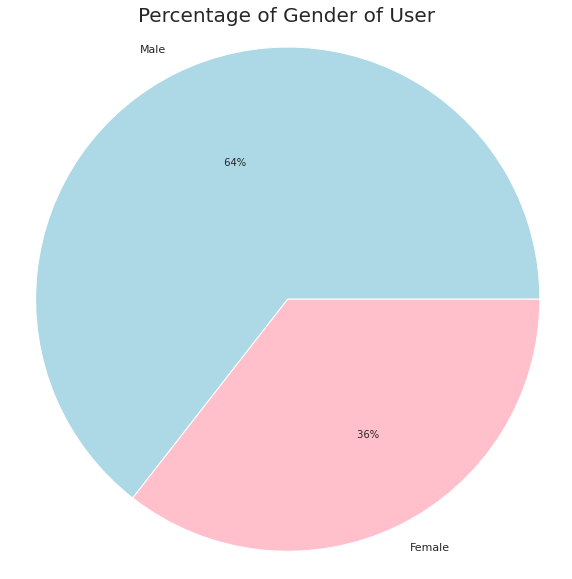

In [ ]:
plt.figure(figsize=(10, 10))

data = gender['counts']
labels = gender['gender']

plt.pie(data,labels=labels,autopct='%11.f%%',colors=('lightblue','pink'))
plt.title('Percentage of Gender of User', fontsize=20)
plt.axis('equal')
plt.show()

Majority of our user are male (64%) and female (36%)

## What is our Age distribution and Age group of our user ?

<AxesSubplot:>

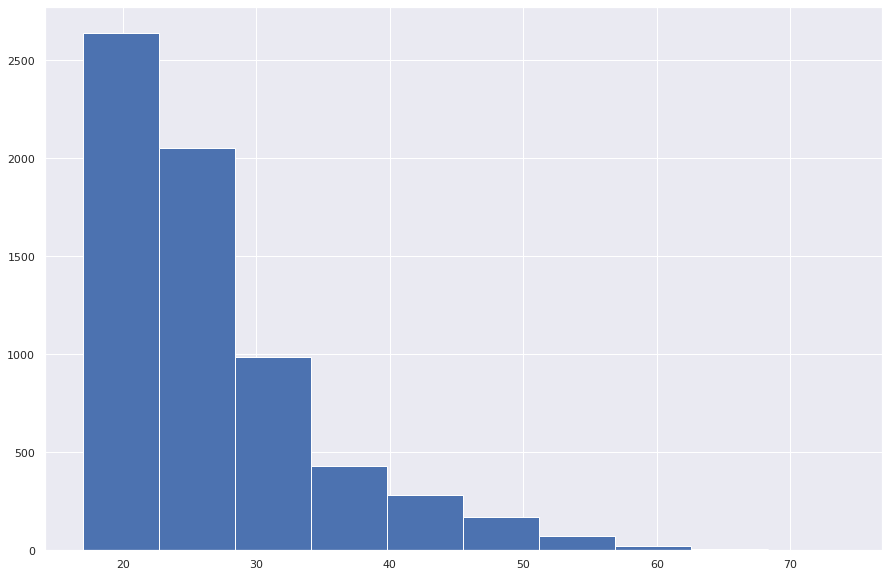

In [ ]:
distinct_user['user_age'].hist(figsize=(15,10))

In [ ]:
age_group = distinct_user.groupby(['Age_Group'])['user_id'].count().sort_values(ascending=False).reset_index()
age_group

,Age_Group,user_id
0,GenZ,4143
1,Millenial,2133
2,GenX,366
3,Boomers,24


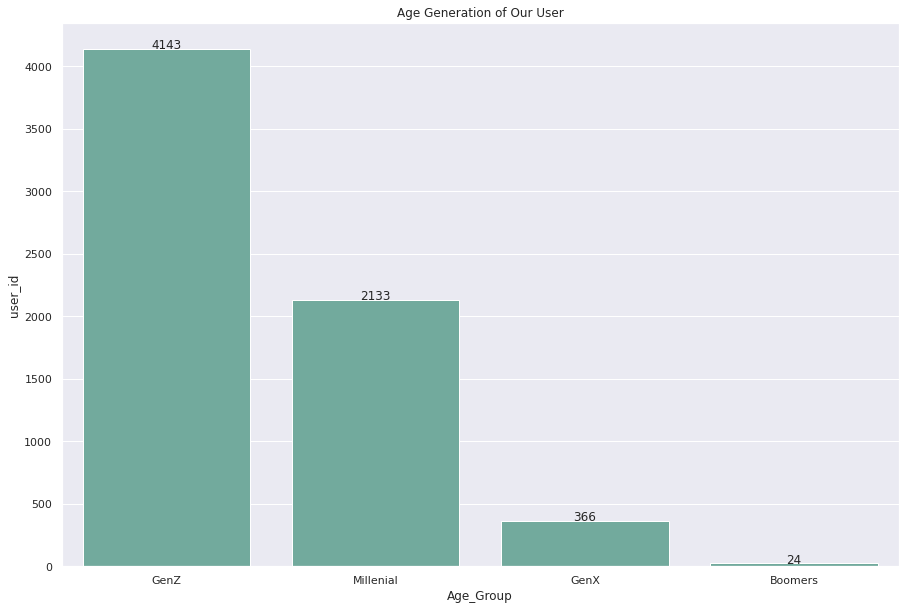

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
# plot a bar chart
ax = sns.barplot(
    x="Age_Group", 
    y="user_id", 
    data=age_group, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')
ax.set(title='Age Generation of Our User')
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), 
# x-coordinate position of data label, padded to be in the middle of the bar
 # y-coordinate position of data label, padded 100 above bar
 y = height+1, 
 # data label, formatted to ignore decimals
 s = '{:.0f}'.format(height),
  # sets horizontal alignment (ha) to center
 ha = 'center')

Majority of our user are coming from GenZ and followed by Millenial this conclude that "FOMO" and how our society trend regarding investment are taking part with this hence contribute the tendency for GenZ and millenial to invest on digital investment than GenX or Boomers

## Is our user using our referral to join ?

In [ ]:
Referral = distinct_user.groupby(['referral_code_used'])['user_id'].count().reset_index()
Referral

,referral_code_used,user_id
0,Not using Referral,4206
1,used referral,2460


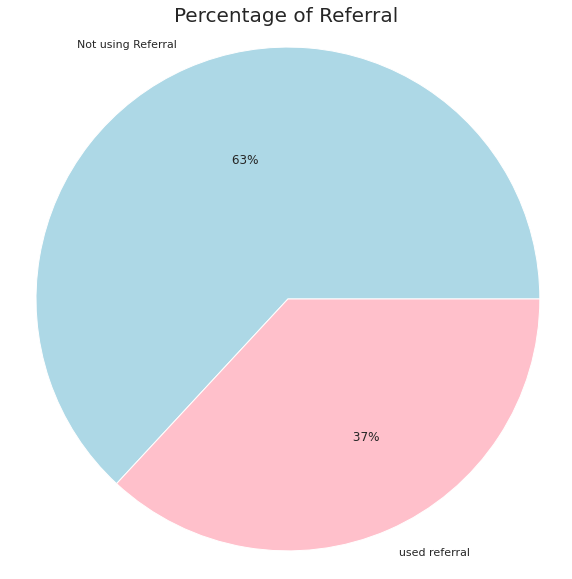

In [ ]:
plt.figure(figsize=(10, 10))

data = Referral['user_id']
labels = Referral['referral_code_used']

plt.pie(data,labels=labels,autopct='%11.f%%',colors=('lightblue','pink'))
plt.title('Percentage of Referral', fontsize=20)
plt.axis('equal')
plt.show()

Only 37% of our user that using referral and 63% of them are not using referral


## What is Income source and range of our user ?

In [ ]:
Income = distinct_user.groupby(['user_income_source'])['user_id'].count().sort_values(ascending=True).reset_index()
Income

,user_income_source,user_id
0,Bunga Simpanan,9
1,Warisan,23
2,Dari Suami / istri,52
3,Hasil Investasi,72
4,Tabungan,214
5,Lainnya,226
6,Dari Orang Tua / Anak,424
7,Undian,816
8,Keuntungan Bisnis,843
9,Gaji,3987


In [ ]:
Income_Range = distinct_user.groupby(['user_income_range'])['user_id'].count().sort_values(ascending=True).reset_index()
Income_Range

,user_income_range,user_id
0,> Rp 1 Miliar,6
1,> Rp 500 Juta - 1 Miliar,15
2,> Rp 100 Juta - 500 Juta,315
3,> Rp 50 Juta - 100 Juta,947
4,Rp 10 Juta - 50 Juta,2223
5,< 10 Juta,3160


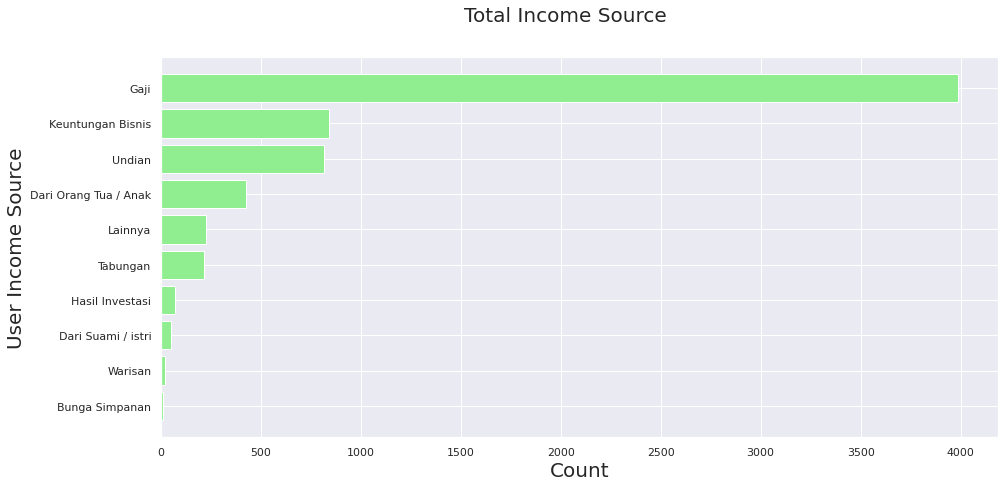

In [ ]:
#Creating size of the chart
fig = plt.figure(figsize=(15, 7))
#Creating the tittle and label of chart
fig.suptitle('Total Income Source', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('User Income Source', fontsize=20)
#Inputting data source for x and y axis
x = Income['user_income_source']
y = Income['user_id']
#Show the bar and pick the color of the chart
plt.barh(x, y, color=('lightgreen'))
plt.show()

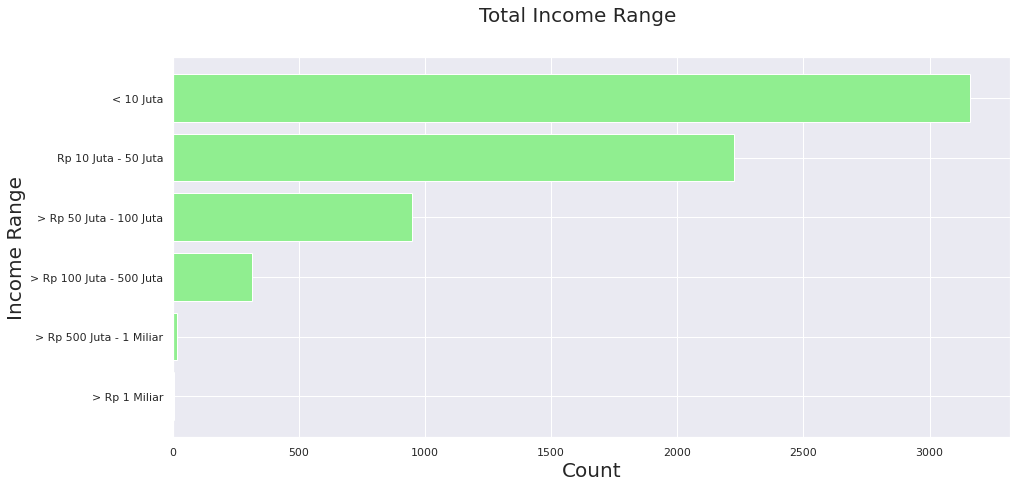

In [ ]:
#Creating size of the chart
fig = plt.figure(figsize=(15, 7))
#Creating the tittle and label of chart
fig.suptitle('Total Income Range', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Income Range', fontsize=20)
#Inputting data source for x and y axis
x = Income_Range['user_income_range']
y = Income_Range['user_id']
#Show the bar and pick the color of the chart
plt.barh(x, y, color=('lightgreen'))
plt.show()

Insight :
1. Majority of income source are from Salary and followed by business revenue. Hence we conclude that majority of our user are someone who worked at company 
2. Majority of income range are falled below 10 million

## How is our trend of investment ?

In [ ]:
df_daily_average = df_daily.replace(0, np.nan).groupby("date").mean().reset_index()
df_daily_average

,date,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,2021-08-04,27.666667,471287.220000,837950.325581,-696439.900000,1995.333333,113448.275862,61912.147059,99044.444444,1.166667e+06,228353.790698
1,2021-08-05,27.636364,390754.098901,580061.950617,-531018.456790,1995.363636,91731.372549,48077.213675,92065.313131,6.333333e+05,188487.162162
2,2021-08-06,27.194215,350705.655629,418034.365672,-404082.784615,1995.805785,98202.484472,46966.727749,96827.032680,2.114286e+06,233458.287554
3,2021-08-09,27.367284,342108.306931,376582.947977,-362209.270588,1995.632716,90789.564356,46549.950207,96832.638298,2.100000e+06,226743.421769
4,2021-08-10,26.733184,319677.602151,332910.952381,-311977.702222,1996.266816,92119.265152,42561.372727,97197.300813,1.827273e+06,205938.187500
5,2021-08-11,26.640374,399205.356044,289879.755208,-306005.656757,1996.359626,91109.428571,44233.977982,93607.186893,2.534918e+06,253577.952452
6,2021-08-12,26.640374,399205.356044,289879.755208,-306005.656757,1996.359626,90255.109264,44354.146341,93650.578164,2.534918e+06,254661.813354
7,2021-08-13,26.614286,399785.190019,291591.494253,-302088.910891,1996.385714,87769.100858,45565.000000,93281.037281,2.514760e+06,252580.692935
8,2021-08-16,26.308983,386928.852848,277056.339216,-289476.571730,1996.691017,88682.081522,47147.684362,96115.859287,2.633612e+06,256141.529344
9,2021-08-17,26.300546,374075.397959,268791.320583,-282350.017510,1996.699454,90399.520593,47134.468874,95499.581356,2.659522e+06,259964.176849


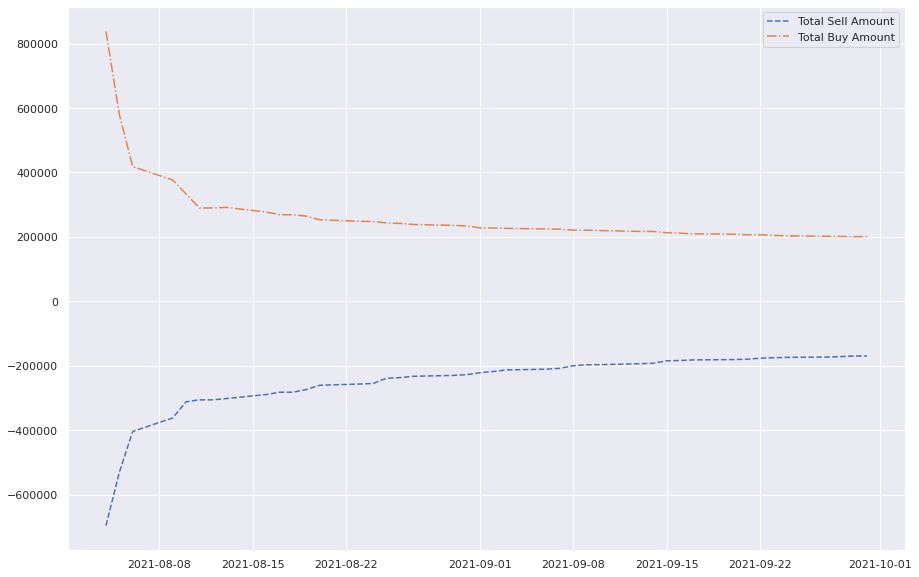

In [ ]:
#Line chart to see trend for buying and selling the investment
plt.plot(df_daily_average['date'], df_daily_average['total_sell_amount'], label = "Total Sell Amount", linestyle="--")
plt.plot(df_daily_average['date'], df_daily_average['total_buy_amount'], label = "Total Buy Amount", linestyle="-.")
plt.legend()
plt.show()

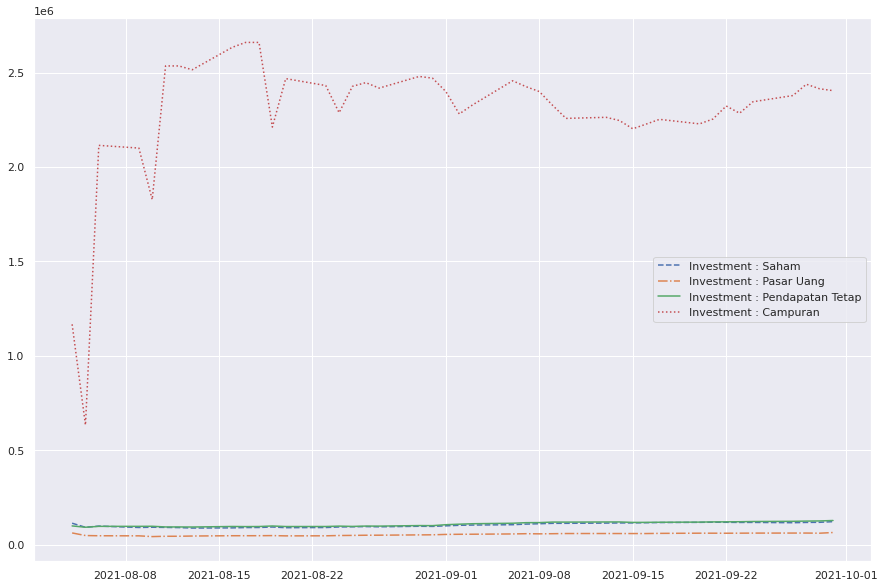

In [ ]:
#Line chart to see trend for investing our product
plt.plot(df_daily_average['date'], df_daily_average['saham_invested_amount'], label = "Investment : Saham", linestyle="--")
plt.plot(df_daily_average['date'], df_daily_average['pasar_uang_invested_amount'], label = "Investment : Pasar Uang", linestyle="-.")
plt.plot(df_daily_average['date'], df_daily_average['pendapatan_tetap_invested_amount'], label = "Investment : Pendapatan Tetap", linestyle="-")
plt.plot(df_daily_average['date'], df_daily_average['campuran_invested_amount'], label = "Investment : Campuran", linestyle=":")
plt.legend()
plt.show()

Insight :    
1. Saham, pasar uang, pdptan tetap remain stagnant for user buying activity. However campuran held the highest fluctuative with increasing trendline from 2021-08-01 to 2021-10-01 
2. Total of customer investment is decreasing, but tendency for customer to sell their product are decreasing which is sign of customer less to invest but will stay with their product and less likely to sold their investment product

## What is average transaction in a month ?

In [ ]:
df_monthly_average = df_monthly.replace(0, np.nan).groupby("date").mean()
df_monthly_average

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,Birth_Year,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
date,,,,,,,,,,
2021-08-31,26.439446,336719.223190,233931.967914,-227963.184105,1996.560554,96586.571429,52045.931590,100572.601681,2.470054e+06,241485.502195
2021-09-30,26.523402,270719.511583,200753.947803,-169878.401760,1996.476598,121680.961196,64121.936845,127747.413150,2.404117e+06,270719.511583


In [ ]:
df_monthly_average = df_monthly_average.T.reset_index()
df_monthly_average

date,index,2021-08-31 00:00:00,2021-09-30 00:00:00
0,user_age,2.643945e+01,2.652340e+01
1,end_of_month_invested_amount,3.367192e+05,2.707195e+05
2,total_buy_amount,2.339320e+05,2.007539e+05
3,total_sell_amount,-2.279632e+05,-1.698784e+05
4,Birth_Year,1.996561e+03,1.996477e+03
5,saham_invested_amount,9.658657e+04,1.216810e+05
6,pasar_uang_invested_amount,5.204593e+04,6.412194e+04
7,pendapatan_tetap_invested_amount,1.005726e+05,1.277474e+05
8,campuran_invested_amount,2.470054e+06,2.404117e+06
9,total_invested_amount,2.414855e+05,2.707195e+05


In average :
1.  From august to September  buy amount of our user are decreasing from 233.932 to 200.753 (-14%) and sell amount are decreasing from 227.963 to 169.878 -(- 30%)
2. From all instrument, saham are the most significant improvement in term of invested amount which is from 96.596 to 121.681 (26%), with campuran remain stagnant from 2.470.054 to 2.404.117. However in average campuran still held the highest invested instrument 

# Clustering Analysis : All Product

## Importing Module

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## Encoding for categorical data

In [ ]:
#We will use monthly for clustering
df_cluster = df_monthly.copy()
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8978 entries, 0 to 8977
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8978 non-null   object        
 1   registration_import_datetime      8978 non-null   datetime64[ns]
 2   user_gender                       8978 non-null   object        
 3   user_age                          8978 non-null   int64         
 4   user_occupation                   8978 non-null   object        
 5   user_income_range                 8978 non-null   object        
 6   referral_code_used                8978 non-null   object        
 7   user_income_source                8978 non-null   object        
 8   end_of_month_invested_amount      8978 non-null   int64         
 9   total_buy_amount                  8978 non-null   int64         
 10  total_sell_amount                 8978 non-null 

In [ ]:
#We will pick only relevant variable for our clustering
df_cluster = df_cluster[['user_id','user_gender','Age_Group','user_occupation','user_income_range','referral_code_used',
                              'saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount',
                         'total_invested_amount','total_buy_amount','total_sell_amount']]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8978 entries, 0 to 8977
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           8978 non-null   object 
 1   user_gender                       8978 non-null   object 
 2   Age_Group                         8978 non-null   object 
 3   user_occupation                   8978 non-null   object 
 4   user_income_range                 8978 non-null   object 
 5   referral_code_used                8978 non-null   object 
 6   saham_invested_amount             8978 non-null   float64
 7   pasar_uang_invested_amount        8978 non-null   float64
 8   pendapatan_tetap_invested_amount  8978 non-null   float64
 9   campuran_invested_amount          8978 non-null   float64
 10  total_invested_amount             8978 non-null   int64  
 11  total_buy_amount                  8978 non-null   int64  
 12  total_

We will change our categorical data : 
1. For gender : male = 0 , female = 1
2. For Age_Group and occupation = one hot encoding
3. For referral will be 0 = not using , 1 = using

In [ ]:
#Changing the income range 
df_cluster.loc[df_cluster['user_income_range'] == '< 10 Juta', 'user_income_range'] = 0
df_cluster.loc[df_cluster['user_income_range'] == 'Rp 10 Juta - 50 Juta', 'user_income_range'] = 1
df_cluster.loc[df_cluster['user_income_range'] == '> Rp 50 Juta - 100 Juta', 'user_income_range'] = 2
df_cluster.loc[df_cluster['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = 3
df_cluster.loc[df_cluster['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = 4
df_cluster.loc[df_cluster['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = 5

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
le = LabelEncoder()

for cat_var in ['user_gender', 'referral_code_used']:
    df_cluster[cat_var] = le.fit_transform(df_cluster[cat_var])  
df_cluster

,user_id,user_gender,Age_Group,user_occupation,user_income_range,referral_code_used,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,total_buy_amount,total_sell_amount
0,3816789,0,GenX,IRT,2,0,190000.0,40000.0,270000.0,0.0,500000,100000,0
1,3816789,0,GenX,IRT,2,0,290000.0,40000.0,270000.0,0.0,600000,100000,0
2,3049927,1,GenX,Swasta,0,0,40000.0,10000.0,50000.0,899000.0,999000,149000,0
3,3836491,1,Boomers,Others,0,1,0.0,10000.0,0.0,0.0,10000,0,0
4,3718933,1,GenX,Pengusaha,3,0,240000.0,40000.0,220000.0,0.0,500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,3798265,0,GenX,IRT,1,1,0.0,0.0,0.0,0.0,0,25000,-125000
8974,3670811,1,GenX,Swasta,2,0,110000.0,130000.0,95000.0,0.0,335000,240000,0
8975,3670811,1,GenX,Swasta,2,0,210000.0,130000.0,95000.0,0.0,435000,240000,0
8976,3812221,1,GenX,Others,3,0,0.0,0.0,0.0,0.0,0,150000,-250000


In [ ]:
df_cluster = pd.get_dummies(df_cluster, columns=['Age_Group','user_occupation'])
df_cluster

,user_id,user_gender,user_income_range,referral_code_used,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,total_buy_amount,total_sell_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
0,3816789,0,2,0,190000.0,40000.0,270000.0,0.0,500000,100000,0,0,1,0,0,1,0,0,0,0
1,3816789,0,2,0,290000.0,40000.0,270000.0,0.0,600000,100000,0,0,1,0,0,1,0,0,0,0
2,3049927,1,0,0,40000.0,10000.0,50000.0,899000.0,999000,149000,0,0,1,0,0,0,0,0,0,1
3,3836491,1,0,1,0.0,10000.0,0.0,0.0,10000,0,0,1,0,0,0,0,1,0,0,0
4,3718933,1,3,0,240000.0,40000.0,220000.0,0.0,500000,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,3798265,0,1,1,0.0,0.0,0.0,0.0,0,25000,-125000,0,1,0,0,1,0,0,0,0
8974,3670811,1,2,0,110000.0,130000.0,95000.0,0.0,335000,240000,0,0,1,0,0,0,0,0,0,1
8975,3670811,1,2,0,210000.0,130000.0,95000.0,0.0,435000,240000,0,0,1,0,0,0,0,0,0,1
8976,3812221,1,3,0,0.0,0.0,0.0,0.0,0,150000,-250000,0,1,0,0,0,1,0,0,0


## Standarize

In [ ]:
scaler = MinMaxScaler()
std_data = df_cluster.set_index('user_id')
std_data[:] = scaler.fit_transform(std_data[:])
std_data

,user_gender,user_income_range,referral_code_used,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,total_buy_amount,total_sell_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
user_id,,,,,,,,,,,,,,,,,,,
3816789,0.0,0.4,0.0,0.306452,0.082949,0.33750,0.000000,0.045455,0.005263,1.00000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3816789,0.0,0.4,0.0,0.467742,0.082949,0.33750,0.000000,0.054545,0.005263,1.00000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3049927,1.0,0.0,0.0,0.064516,0.020737,0.06250,0.081727,0.090818,0.007842,1.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3836491,1.0,0.0,1.0,0.000000,0.020737,0.00000,0.000000,0.000909,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3718933,1.0,0.6,0.0,0.387097,0.082949,0.27500,0.000000,0.045455,0.000000,1.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798265,0.0,0.2,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.001316,0.99375,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3670811,1.0,0.4,0.0,0.177419,0.269584,0.11875,0.000000,0.030455,0.012632,1.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3670811,1.0,0.4,0.0,0.338710,0.269584,0.11875,0.000000,0.039545,0.012632,1.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## K-Means

In [ ]:
#Assigning cluster here and fit our model 
model = KMeans(n_clusters=5, init = 'k-means++', random_state=42)
cluster_labels = model.fit_predict(std_data)
std_data['Cluster'] = cluster_labels
std_data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_gender,user_income_range,referral_code_used,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,total_buy_amount,total_sell_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,Cluster
user_id,,,,,,,,,,,,,,,,,,,,
3816789,0.0,0.4,0.0,0.306452,0.082949,0.3375,0.000000,0.045455,0.005263,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3816789,0.0,0.4,0.0,0.467742,0.082949,0.3375,0.000000,0.054545,0.005263,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3049927,1.0,0.0,0.0,0.064516,0.020737,0.0625,0.081727,0.090818,0.007842,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3836491,1.0,0.0,1.0,0.000000,0.020737,0.0000,0.000000,0.000909,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3718933,1.0,0.6,0.0,0.387097,0.082949,0.2750,0.000000,0.045455,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
#Here we see the difference between each cluster from 2 cluster to 15 cluster
ssd = []
for k in range(2,15) :
    model = KMeans(n_clusters=k)
    model.fit(std_data)
    ssd.append(model.inertia_)
ssd

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

[16848.70776772264,
 12340.93054626866,
 8938.330884484769,
 6876.096738776872,
 6289.757910108979,
 5858.626962271335,
 5238.7958069938995,
 4887.3372705330075,
 4515.327120419843,
 4086.4063918743295,
 3745.003012433189,
 3495.501387596508,
 3082.956703168664]

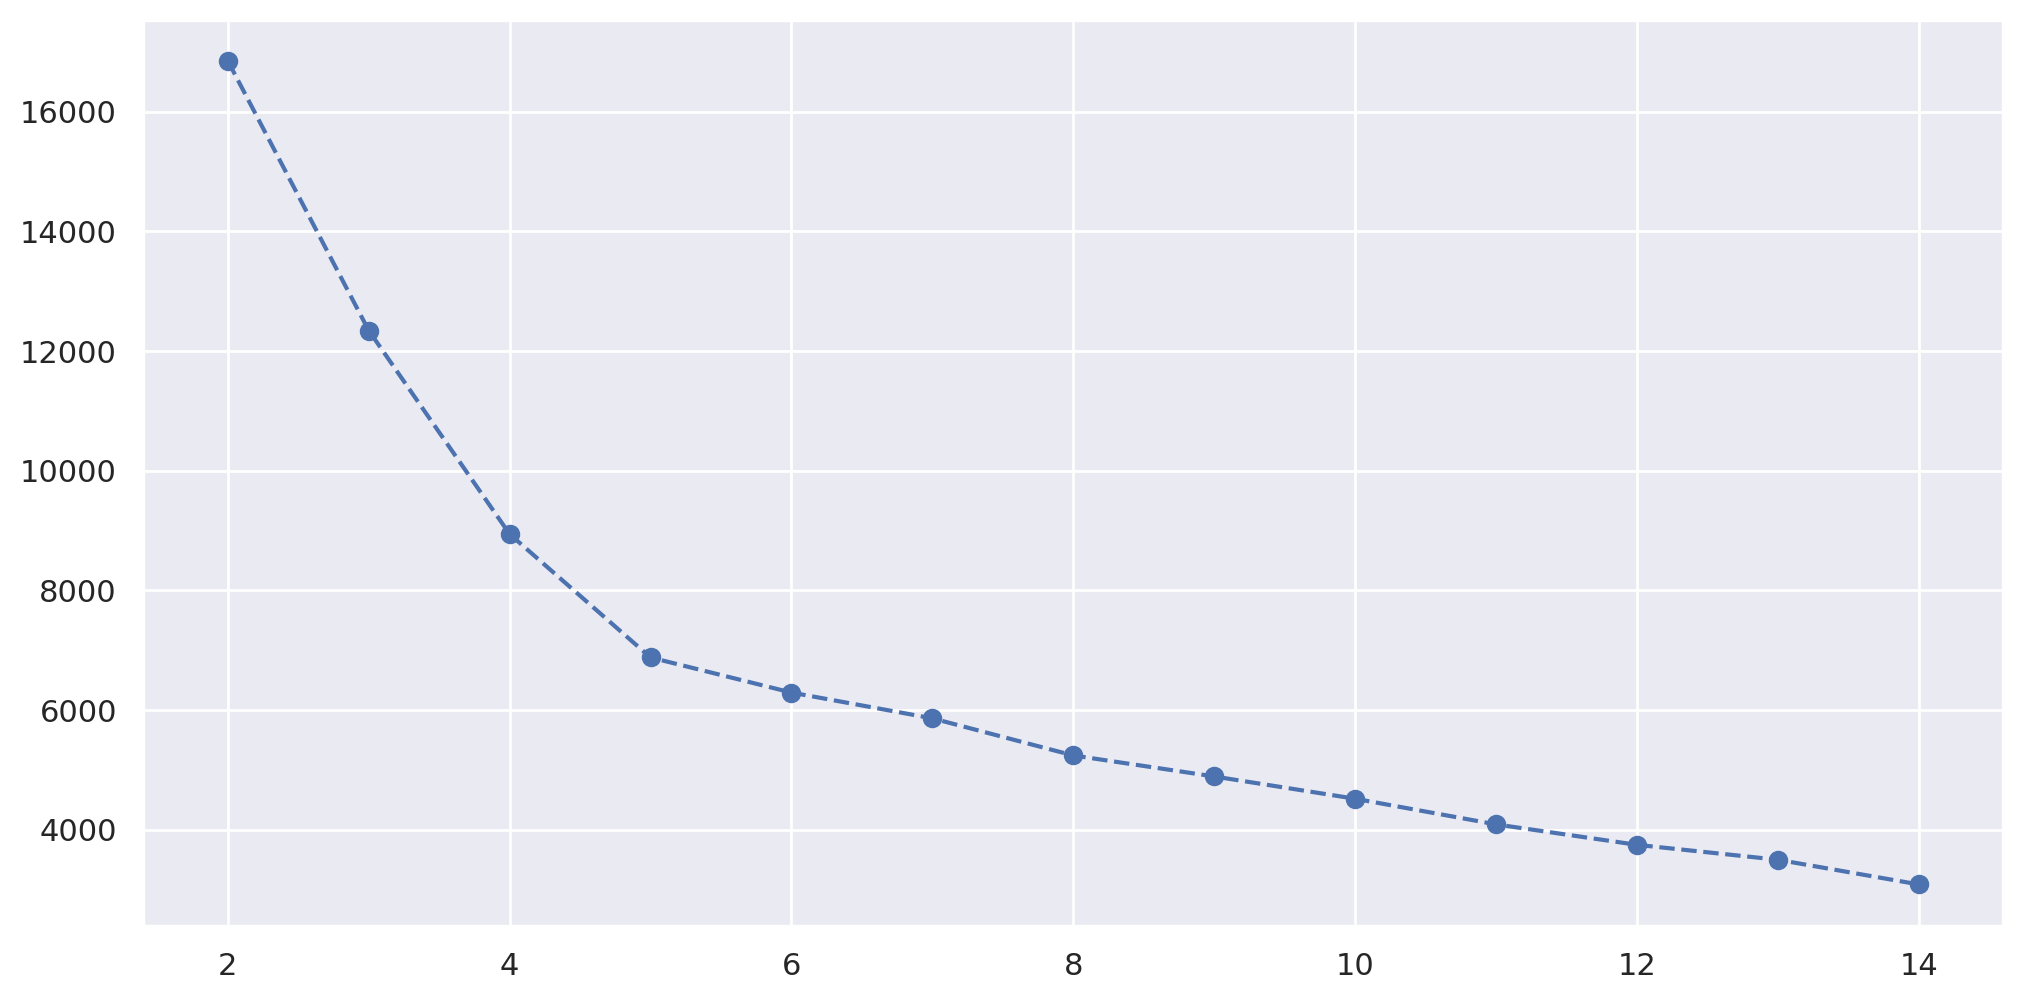

In [ ]:
#Creating Elbow Method
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(2,15),ssd,'o--')

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.46066911567510077


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.440311609113062


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5023548856734942


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5190784476765917


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5096163081174803


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.5207975137120533


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.5283941105812219


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.5267563862206899


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.5243841924728695


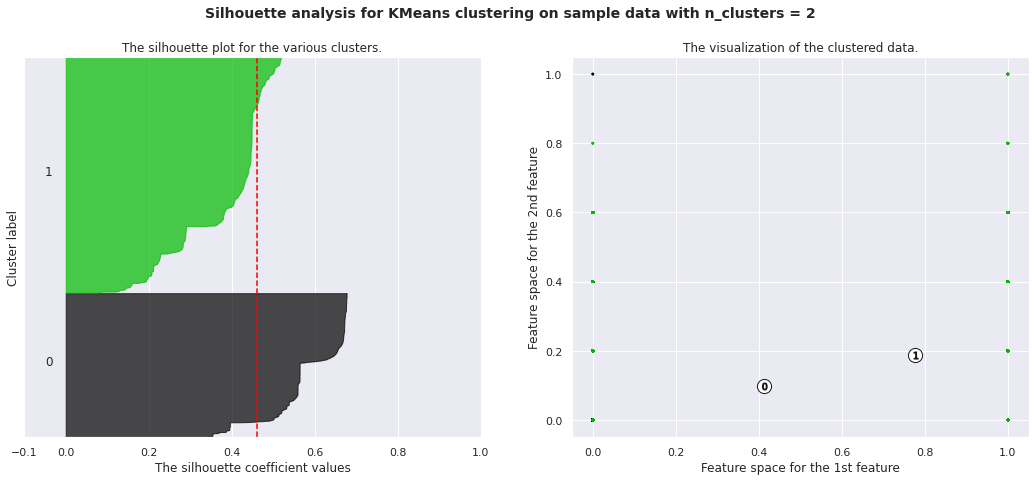

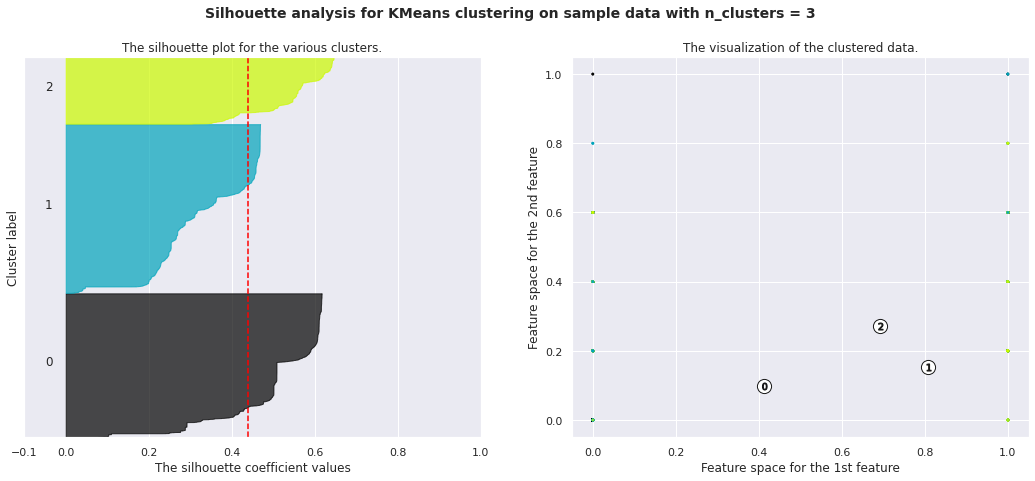

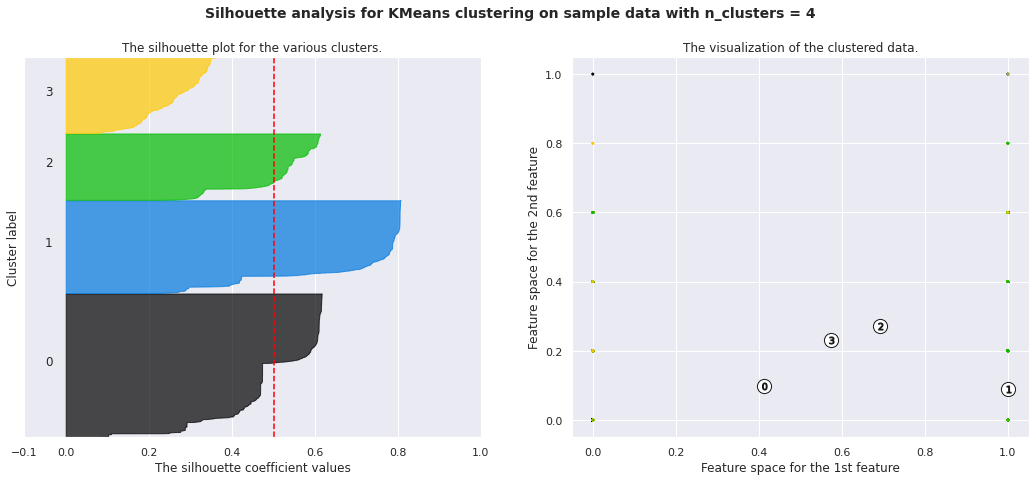

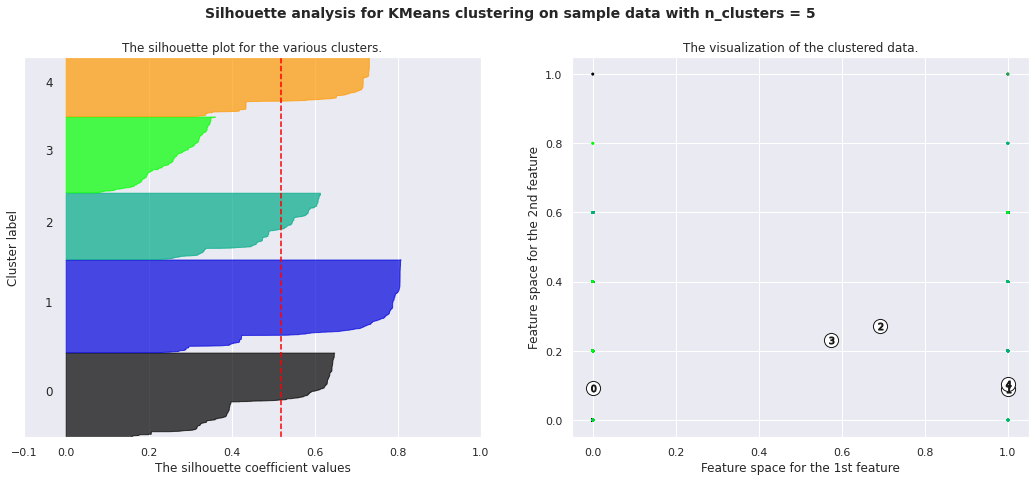

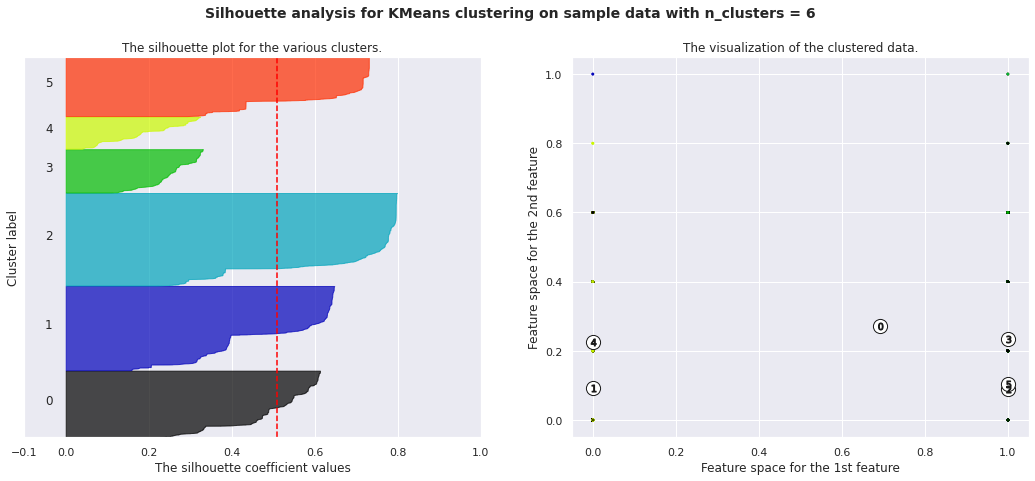

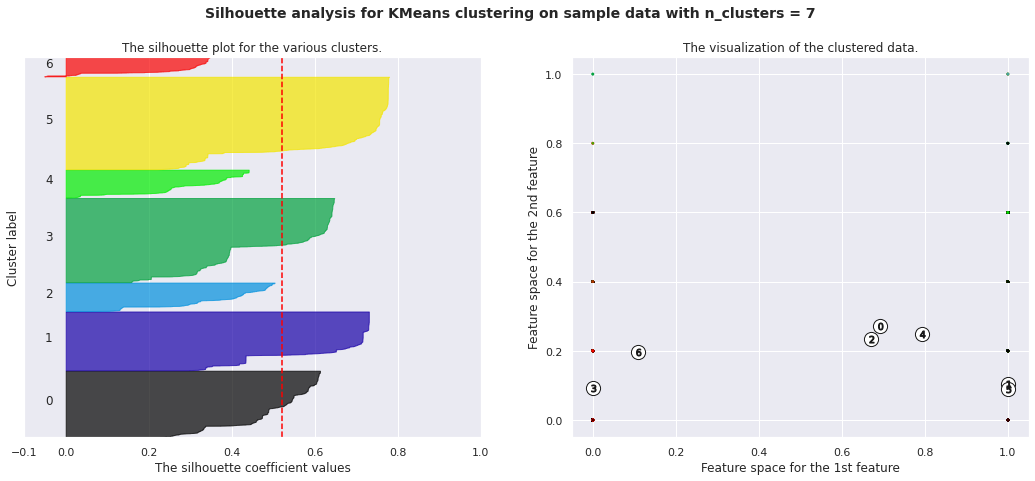

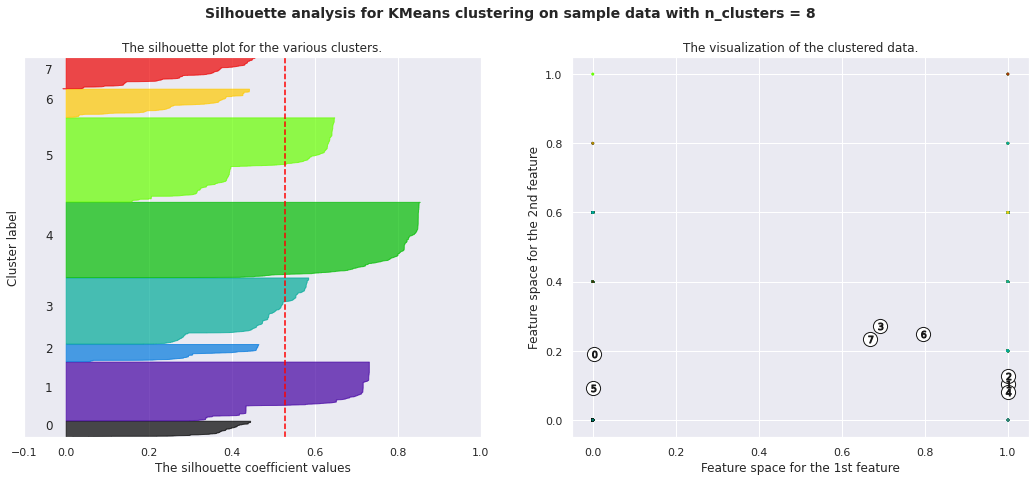

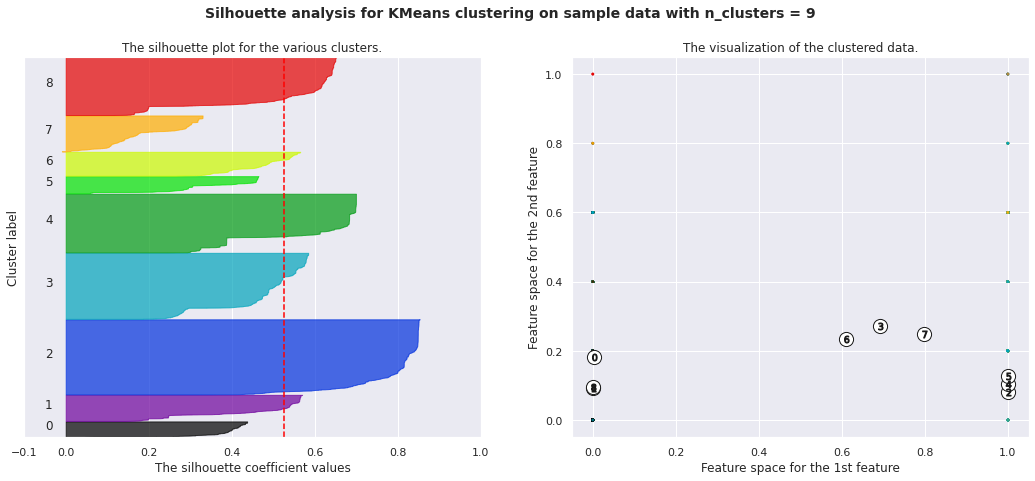

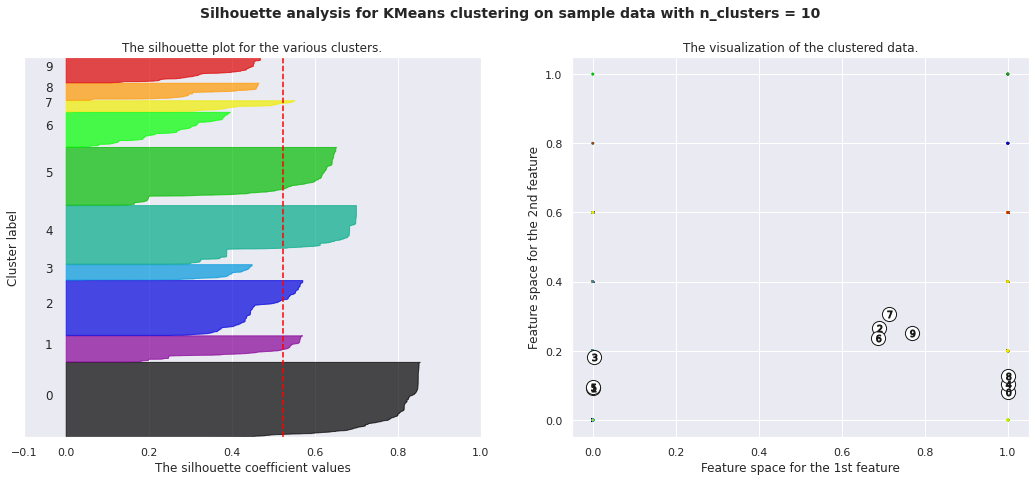

In [ ]:
#Checking using Sillhouette Analysis
silhoutte_analysis(std_data,list(range(2,11)))

When we check between using inertia method we see that 5 is the best cluster for this one, we only need to use inertia and elbow if we are unsure with the Sillhouette because using inertia and elbow are more intrpretable

# Clustering Analysis : Top Product (Campuran Only)

We need to separate 2 things here because we want to check the cluster difference between top product and all product

In [ ]:
df_cluster_top_product = df_cluster.copy()
df_cluster_top_product

,user_id,user_gender,user_income_range,referral_code_used,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount,total_buy_amount,total_sell_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
0,3816789,0,2,0,190000.0,40000.0,270000.0,0.0,500000,100000,0,0,1,0,0,1,0,0,0,0
1,3816789,0,2,0,290000.0,40000.0,270000.0,0.0,600000,100000,0,0,1,0,0,1,0,0,0,0
2,3049927,1,0,0,40000.0,10000.0,50000.0,899000.0,999000,149000,0,0,1,0,0,0,0,0,0,1
3,3836491,1,0,1,0.0,10000.0,0.0,0.0,10000,0,0,1,0,0,0,0,1,0,0,0
4,3718933,1,3,0,240000.0,40000.0,220000.0,0.0,500000,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,3798265,0,1,1,0.0,0.0,0.0,0.0,0,25000,-125000,0,1,0,0,1,0,0,0,0
8974,3670811,1,2,0,110000.0,130000.0,95000.0,0.0,335000,240000,0,0,1,0,0,0,0,0,0,1
8975,3670811,1,2,0,210000.0,130000.0,95000.0,0.0,435000,240000,0,0,1,0,0,0,0,0,0,1
8976,3812221,1,3,0,0.0,0.0,0.0,0.0,0,150000,-250000,0,1,0,0,0,1,0,0,0


In [ ]:
#Drop all insturment except campuran
df_cluster1 = df_cluster_top_product.drop(['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','total_invested_amount',
                                           'total_buy_amount','total_sell_amount'],axis=1,inplace=True)

In [ ]:
scaled_x = scaler.fit_transform(df_cluster_top_product[['campuran_invested_amount']])
scaled_x

array([[0.        ],
       [0.        ],
       [0.08172727],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
model = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
cluster_labels = model.fit_predict(scaled_x)
df_cluster_top_product['Cluster'] = cluster_labels
df_cluster_top_product.head()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_gender,user_income_range,referral_code_used,campuran_invested_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,Cluster
0,3816789,0,2,0,0.0,0,1,0,0,1,0,0,0,0,0
1,3816789,0,2,0,0.0,0,1,0,0,1,0,0,0,0,0
2,3049927,1,0,0,899000.0,0,1,0,0,0,0,0,0,1,0
3,3836491,1,0,1,0.0,1,0,0,0,0,1,0,0,0,0
4,3718933,1,3,0,0.0,0,1,0,0,0,0,0,1,0,0


In [ ]:
#See the elbow method
ssd = []
for k in range(2,15) :
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    ssd.append(model.inertia_)
ssd

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

[3.6115495433075244,
 0.946348790098096,
 0.37887605075833614,
 0.15046124020782153,
 0.09890756857297074,
 0.0659534498931604,
 0.051087633707494556,
 0.03672858083172142,
 0.026144814234195072,
 0.018315323151113984,
 0.011765355737616967,
 0.007337958024225039,
 0.005354486949843988]

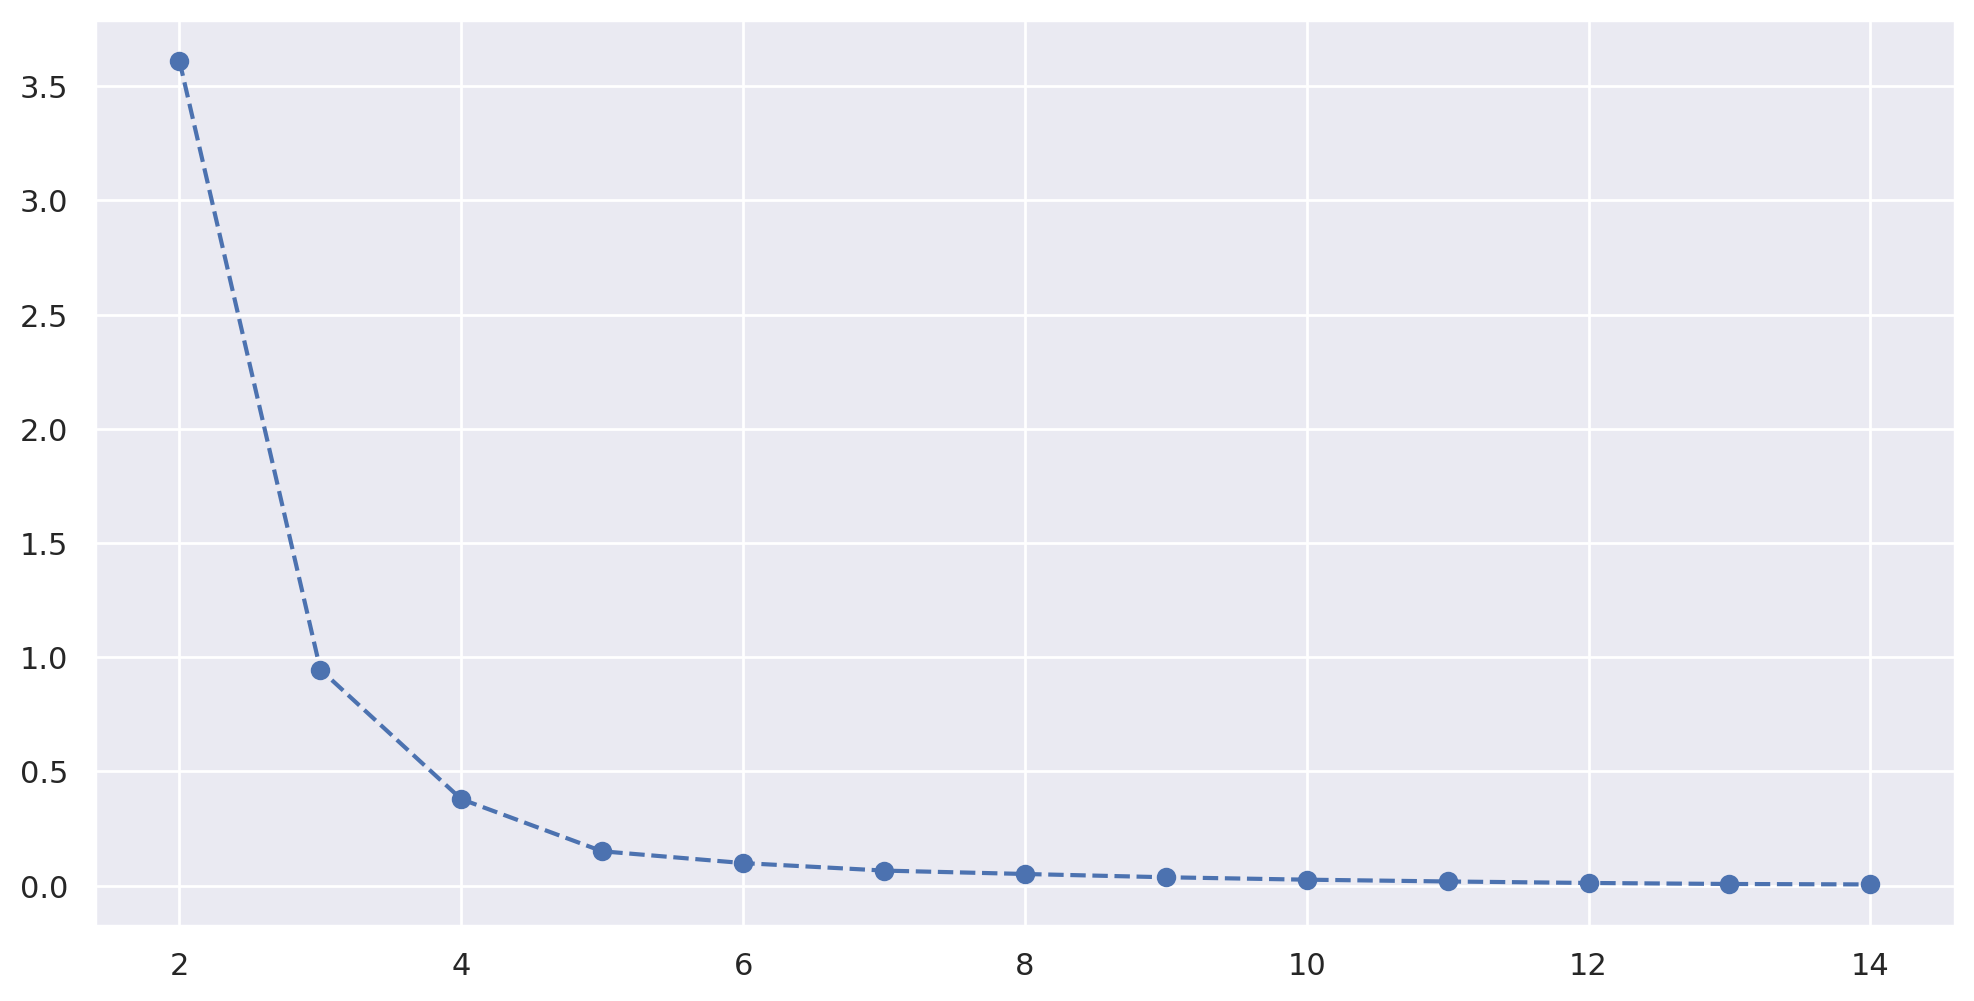

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(range(2,15),ssd,'o--')

The difference when all product we need 5 kind of segmentation but with only campuran we only need 3 segmentation. Hence, we will choose for this only because :  
1. Campuran is the most preferable instrument among all its show from average , and maximum investment are on campuran
2. 3 segmentation are more preferable from our marketing team

# Clustering EDA

In [ ]:
Cluster = df_cluster_top_product.copy()
Cluster

,user_id,user_gender,user_income_range,referral_code_used,campuran_invested_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,Cluster
0,3816789,0,2,0,0.0,0,1,0,0,1,0,0,0,0,0
1,3816789,0,2,0,0.0,0,1,0,0,1,0,0,0,0,0
2,3049927,1,0,0,899000.0,0,1,0,0,0,0,0,0,1,0
3,3836491,1,0,1,0.0,1,0,0,0,0,1,0,0,0,0
4,3718933,1,3,0,0.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,3798265,0,1,1,0.0,0,1,0,0,1,0,0,0,0,0
8974,3670811,1,2,0,0.0,0,1,0,0,0,0,0,0,1,0
8975,3670811,1,2,0,0.0,0,1,0,0,0,0,0,0,1,0
8976,3812221,1,3,0,0.0,0,1,0,0,0,1,0,0,0,0


In [ ]:
Campuran = Cluster['campuran_invested_amount'].groupby(Cluster['Cluster']).agg(['count','mean','max','min','sum']).reset_index()
Campuran

,Cluster,count,mean,max,min,sum
0,0,8909,6.358626e+03,1300000.0,0.0,56649000.0
1,1,20,9.950000e+06,11000000.0,8000000.0,199000000.0
2,2,49,2.751889e+06,5000000.0,1500000.0,134842582.0


In [ ]:
AverageSummary = Cluster.groupby(['Cluster'],as_index=False).mean()
AverageSummary

,Cluster,user_gender,referral_code_used,campuran_invested_amount,Age_Group_Boomers,Age_Group_GenX,Age_Group_GenZ,Age_Group_Millenial,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
0,0,0.638568,0.345381,6.358626e+03,0.003704,0.054552,0.626670,0.315075,0.053878,0.131328,0.567067,0.036480,0.211247
1,1,0.550000,0.200000,9.950000e+06,0.000000,0.500000,0.150000,0.350000,0.300000,0.150000,0.100000,0.100000,0.350000
2,2,0.510204,0.428571,2.751889e+06,0.000000,0.142857,0.367347,0.489796,0.020408,0.183673,0.387755,0.122449,0.285714


Cluster 1 (FOMO Investor)  : 
*   8909 user with 63% are female , 34% using referral , 62% are genZ and 31% are millenial
*  56% are pelajar, with 21% are Swasta
*  In average they spend 6358 for campuran with maximum are 1.300.000 and total investment are 56.649.000

Cluster 2 (White Shark VC): 
*   20 user with 55% are female , 20% using referral , 50% from GenX, 35% are millenial and 15% are GenZ
*   30% occupation are IRT , 35% are swasta 
*   In average they invest 9.950.000 with minimum are 80.000.000 and total investment by this cluster are 199.000.000 which is are our highest investor

Cluster 3 (Angel Investor) :
*   49 user in this cluster with 51% are female ,42% using referral, 49% are millenial, 36% are genZ
*  38% are from pelajar, 28% are from swasta 
*   In average they spend 2.751.889 with minimum are 15.000.000 and maximum are 50.000.000 and total investment are 134.842.582





















In [ ]:
Total_Revenue = Cluster['campuran_invested_amount'].groupby(Cluster['Cluster']).sum().reset_index()
Total_Revenue

,Cluster,campuran_invested_amount
0,0,56649000.0
1,1,199000000.0
2,2,134842582.0


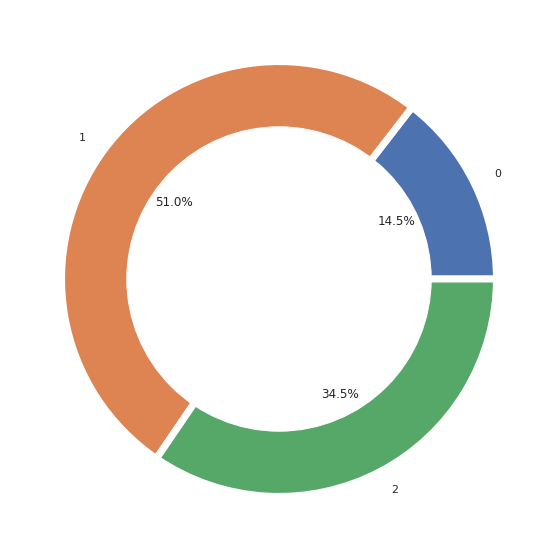

In [ ]:
#Revenue Chart
names = Total_Revenue['Cluster']
size = Total_Revenue['campuran_invested_amount']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
